## Setting

In [141]:
using NeuralVerification, LazySets, Plots
using NeuralVerification: ReLU, Id

We consider a small network that encodes the function 
    
$$
f(x) = 24~\max(x + 1.5, 0) + 18.5
$$

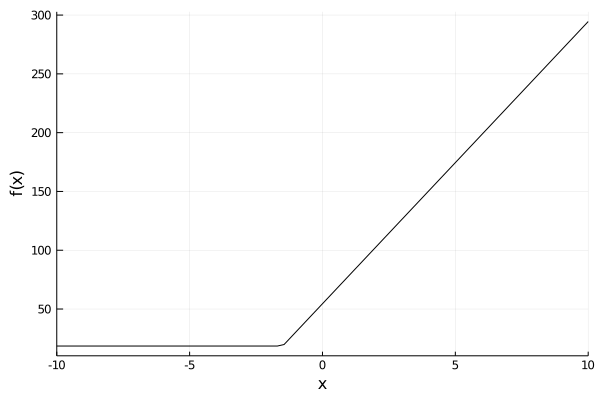

In [167]:
f(x) = 24*max(x + 1.5, 0) + 18.5

fig = plot()
plot!(fig, f, xlims=(-10.0, 10.0), xlab="x", ylab="f(x)", lab="", color=:black)

In [143]:
file = "small_nnet.nnet"
small_nnet = read_nnet(file, last_layer_activation = ReLU())

Network(NeuralVerification.Layer[NeuralVerification.Layer{ReLU,Float64}([1.0; 1.0], [1.5, 1.5], ReLU()), NeuralVerification.Layer{ReLU,Float64}([2.0 2.0; 2.0 2.0], [2.5, 2.5], ReLU()), NeuralVerification.Layer{ReLU,Float64}([3.0 3.0], [3.5], ReLU())])

In [144]:
length(small_nnet.layers)

3

The network has three layers and one output.

With the following fucntion we propagate an initial set $X_0 \subseteq \mathbb{R}$ through the neural network `network`.

In [160]:
function forward_propagate(network, X0)
    Y = copy(X0)
    for Li in network.layers
        Wi, bi = Li.weights, Li.bias
        Y = Wi * Y + bi |> concretize |> Rectification
        Y = overapproximate(Y, Zonotope)
    end
    return Y
end

forward_propagate (generic function with 2 methods)

## Solution for singleton values

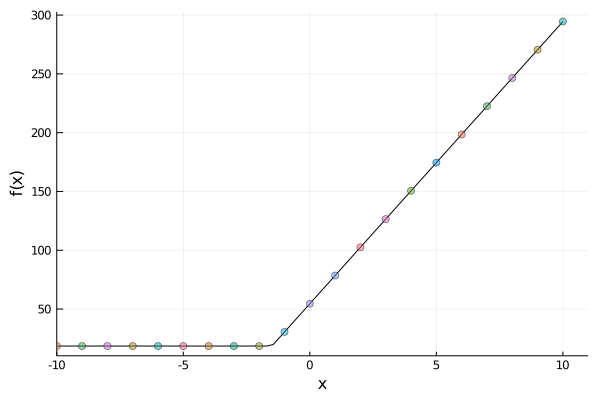

In [169]:
xin = [Singleton([α]) for α in -10:1.0:10]
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)])

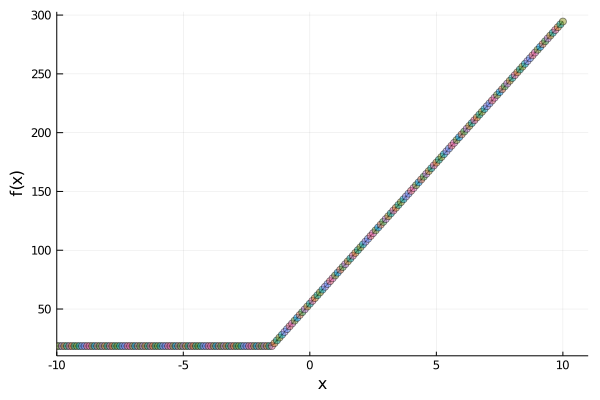

In [171]:
xin = [Singleton([α]) for α in -10:0.1:10]
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)])

## Solution for initial sets

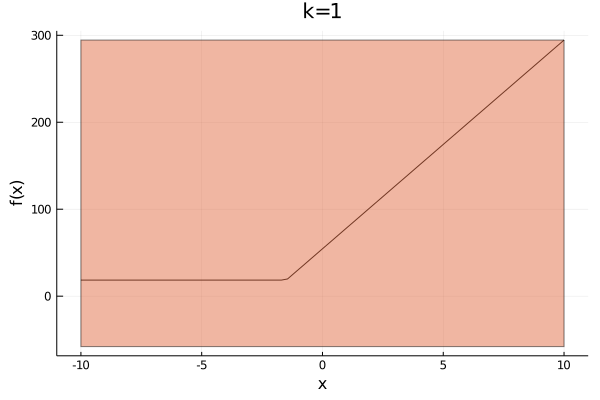

In [176]:
k = 1
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

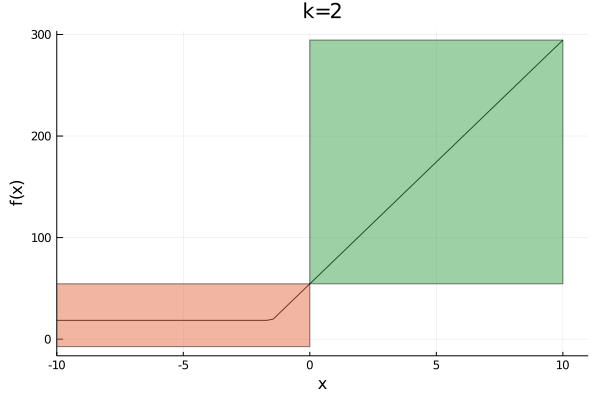

In [177]:
k = 2
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

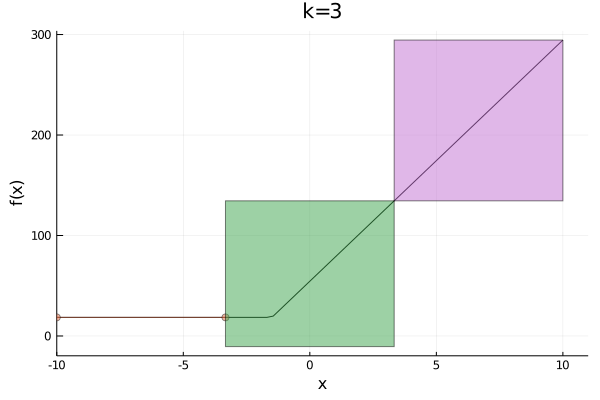

In [179]:
k = 3
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

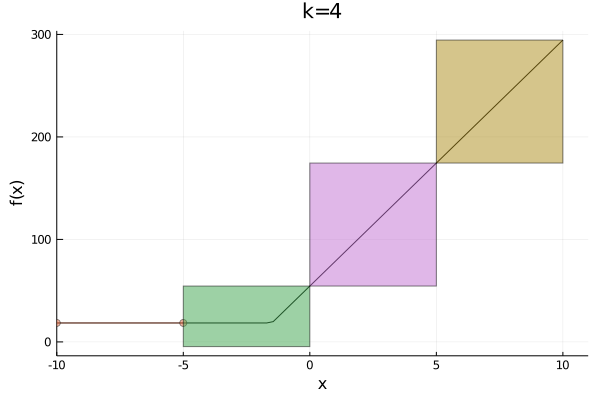

In [180]:
k = 4
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")

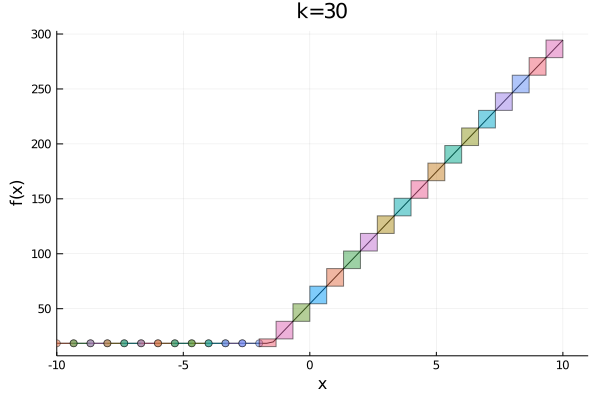

In [184]:
k = 30
xin = split(Interval(-10, 10), [k])
xout = [forward_propagate(small_nnet, x) for x in xin]
plot!(deepcopy(fig), [xi × xo for (xi, xo) in zip(xin, xout)], title="k=$k")